<html>
    <div style="color:#363945; background-color:#E1F6FF; display: block">
        <h1> Feature Engineering - Notebook Summary </h1>
            <ol>
                <li>Apply <strong>Dimensionality Reduction</strong> to features using <strong>TSNE</strong> algorithm in order to better fit our model.</li>
                <li>Apply <strong>Agglomerative Clustering Algorithm</strong> to the projections of the dimensionality reduction step to get clusters of skills related to different jobs.</li>
                <li><strong>Visualization</strong> of the projections and comparison before and after applying Clustering.</li>
                <li>Building a basic <strong>Logistic Regression model</strong> to predict job profiles based on each group of skills</li>
                <li>Comparison between metrics of the model on <strong>original feature set</strong> and our <strong>feature engineered set</strong>.</li>
                <li><strong>Save</strong> Feature Engineering Output.</li>
            </ol>
        <h3>For interactive visualizations, visit my notebook <a href = "http://localhost:8888/lab/tree/IT_Educational_Institute_Data_Analysis/notebooks/03_Feature_Engineering.ipynb"; target="_blank">Here</a></h3>
    </div>
</html>

In [1]:
# CONSTANTS
DF_PATH = "C:/Users/Rami/Projects/IT_Educational_Institute_Data_Analysis/data/processed/02_preprocessed_1_Hot_Encoded.pkl"
EXPORT_FEATURES_DIR = "C:/Users/Rami/Projects/IT_Educational_Institute_Data_Analysis/data/processed/"

# Technologies worked` with
TECH_COLS = ['DatabaseWorkedWith', 'LanguageWorkedWith', 
             'MiscTechWorkedWith', 'WebframeWorkedWith']

# Job Titles
ROLE_COLS = ['DevType']

In [2]:
import numpy as np
import pandas as pd
import os
import pickle
import yaml

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering

from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import silhouette_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score


import matplotlib.pyplot as plt
import plotly 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio

# Used i_frame_connected to display interactive figures inside the notebook
pio.renderers.default = 'iframe_connected'

pio.renderers.default = 'png'

In [3]:
df = pd.read_pickle(DF_PATH)
df

DatabaseWorkedWith                                                    \
               Cassandra Couchbase DynamoDB Elasticsearch Firebase IBM DB2   
0                      0         0        0             1        0       0   
1                      0         0        0             0        0       0   
2                      0         0        0             0        0       0   
3                      0         0        0             0        0       0   
4                      0         0        0             0        0       0   
...                  ...       ...      ...           ...      ...     ...   
64456                  0         0        0             0        0       0   
64457                  1         1        1             1        1       1   
64458                  0         0        0             0        0       0   
64459                  0         0        0             0        0       0   
64460                  0         0        0             0        0       0   

                                                  ...           DevType  \
      MariaDB Microsoft SQL Server MongoDB MySQL  ... Developer, mobile   
0           0                    1       0     0  ...                 0   
1           0                    0       0     0  ...                 1   
2           0                    0       0     0  ...                 0   
3           0                    0       0     0  ...                 0   
4           0                    0       0     1  ...                 0   
...       ...                  ...     ...   ...  ...               ...   
64456       0                    0       0     0  ...                 0   
64457       1                    1       1     1  ...                 0   
64458       0                    0       0     0  ...                 0   
64459       0                    0       0     0  ...                 0   
64460       1                    1       0     1  ...                 0   

                                                                              \
      Educator Engineer, data Engineer, site reliability Engineering manager   
0            0              0                          0                   0   
1            0              0                          0                   0   
2            0              0                          0                   0   
3            0              0                          0                   0   
4            0              0                          0                   0   
...        ...            ...                        ...                 ...   
64456        0              0                          0                   0   
64457        0              0                          0                   0   
64458        0              0                          0                   0   
64459        0              0                          0                   0   
64460        0              0                          0                   0   

                                                                 \
      Marketing or sales professional Product manager Scientist   
0                                   0               0         0   
1                                   0               0         0   
2                                   0               0         0   
3                                   0               0         0   
4                                   0               0         0   
...                               ...             ...       ...   
64456                               0               0         0   
64457                               0               0         0   
64458                               0               0         0   
64459                               0               0         0   
64460                               0               0         0   

                                                
      Senior executive/VP System administrator  
0   

## 1. Dimensionality Reduction

In [4]:
# Normalize data to apply dimensionality reduction
skills_ohe = df.drop('DevType', axis=1).copy()
std_skills = StandardScaler().fit_transform(skills_ohe)
std_skills.T.shape

C:\Users\Rami\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

C:\Users\Rami\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



(74, 64461)

In [5]:
# Apply Dimensionality Reduction using TSNE 
tsne_projection = TSNE(n_components= 2,
                        perplexity= 2.5,
                        learning_rate= 1,
                        init='pca',
                        method='barnes_hut',
                        n_iter= 10000,                       
                        n_jobs= -1,
                        random_state= 0).fit_transform(std_skills.T)

tsne_projection = pd.DataFrame(tsne_projection, index=skills_ohe.columns)

C:\Users\Rami\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



In [6]:
tsne_projection

0          1
DatabaseWorkedWith Cassandra     -100.243652  -9.921690
                   Couchbase      -97.869446  -5.111022
                   DynamoDB       -60.006569  12.016876
                   Elasticsearch  -69.051796  11.441289
                   Firebase        38.525051  18.118279
...                                      ...        ...
WebframeWorkedWith Ruby on Rails  -77.665230  36.967571
                   Spring          67.981071  -1.194826
                   Symfony         -0.315440  64.985153
                   Vue.js           8.292903  75.977203
                   jQuery          40.767498  77.932251

[74 rows x 2 columns]

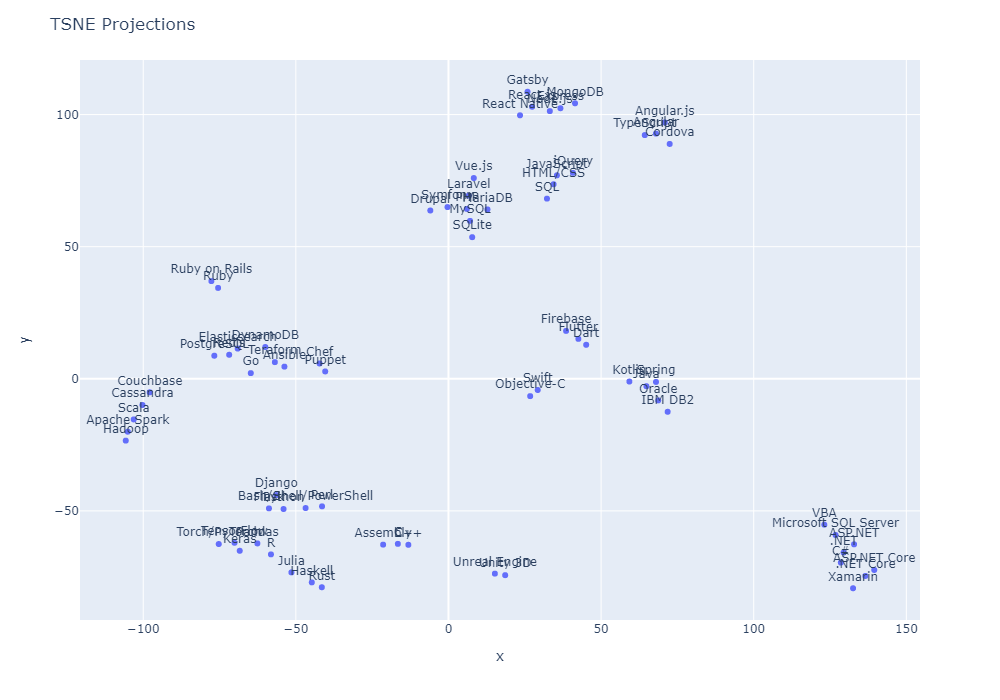

In [7]:
# Visualize Projections
fig = px.scatter(x= tsne_projection[0], y= tsne_projection[1], text= tsne_projection.droplevel(0).index)
fig.update_traces(textposition='top center')
fig.update_layout(height=700, width=1000, title='TSNE Projections')
fig.show()

## 2. Clustering

In [8]:
n_clusters_range = list(range(5,25))
silhouette_scores = []
best_cluster_model = None

for n_clusters in n_clusters_range:
    cluster_model = AgglomerativeClustering(n_clusters=n_clusters, linkage= 'ward')
    cluster_labels = cluster_model.fit_predict(tsne_projection)  # Predicts assigned cluster of different projections
    
    silhouette_avg = silhouette_score(tsne_projection, cluster_labels) # Ranges from -1 to 1 (Worst = -1 and Best = 1)
    silhouette_scores += [silhouette_avg]   
    
    if silhouette_avg >= np.max(silhouette_scores):
        best_cluster_model = cluster_model # Choosing best clustering model


<html>
    <h3 style = "color:blue">Note on Silhouette Score</h3>
    <ul>
        <li> <strong style="color:green">Best Score = 1 </strong></li>
        <li> <strong style="color:red">Worst Score = -1</strong> <strong>(assigned to wrong cluster)</strong></li>
    </ul>
</html>

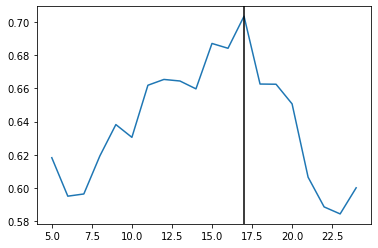

In [9]:
%matplotlib inline
plt.plot(n_clusters_range, silhouette_scores)
plt.axvline(best_cluster_model.n_clusters, color='black')

<html>
    <h3 style = "color:green"> 17 Clusters seems to be the best result</h3>
</html>

In [10]:
# A list containing labels of 17 clusters
cluster_labels = ["Skills_Group_{}".format(str(label))
                  for label in best_cluster_model.labels_]

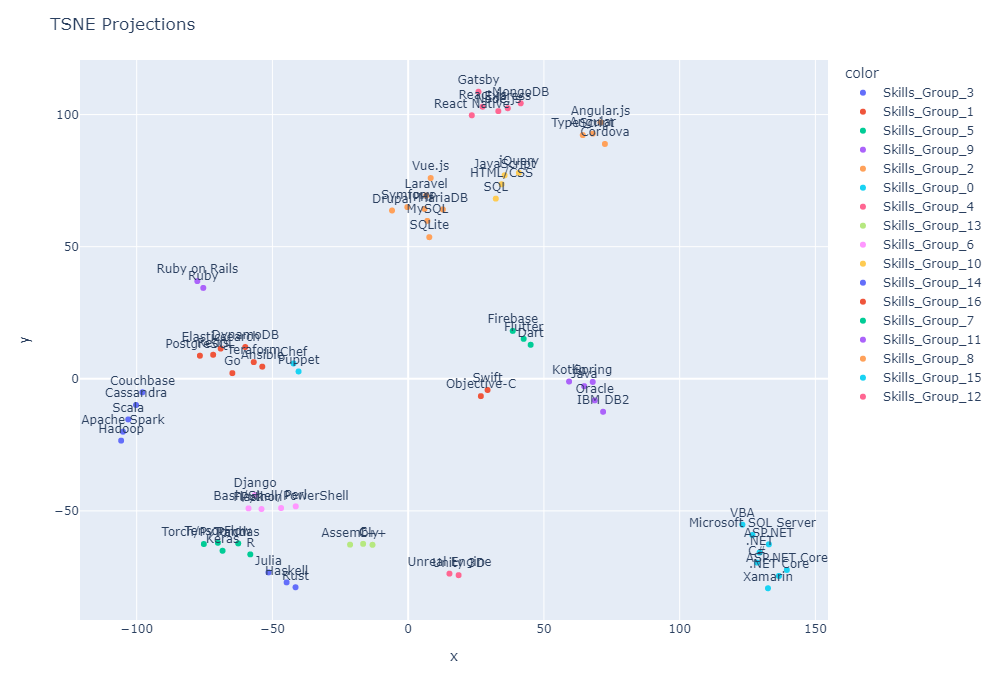

In [11]:
# Visualizing Clustering output
fig = px.scatter(x= tsne_projection[0], 
                 y= tsne_projection[1], 
                 text= tsne_projection.droplevel(0).index,
                 color = cluster_labels)

fig.update_traces(textposition='top center')
fig.update_layout(height=700, width=1000, title='TSNE Projections')
fig.show()

In [12]:
# Different Clusters of skills Exploration
skills_clusters = tsne_projection.index.droplevel(0).to_series().groupby(cluster_labels).apply(list)
for cluster, skills in skills_clusters.items():
    print(cluster)
    print(skills)

Skills_Group_0
['Microsoft SQL Server', 'C#', 'VBA', '.NET', '.NET Core', 'Xamarin', 'ASP.NET', 'ASP.NET Core']
Skills_Group_1
['DynamoDB', 'Elasticsearch', 'PostgreSQL', 'Redis', 'Go', 'Ansible', 'Teraform']
Skills_Group_10
['HTML/CSS', 'JavaScript', 'SQL', 'jQuery']
Skills_Group_11
['Ruby', 'Ruby on Rails']
Skills_Group_12
['Unity 3D', 'Unreal Engine']
Skills_Group_13
['Assembly', 'C', 'C++']
Skills_Group_14
['Haskell', 'Julia', 'Rust']
Skills_Group_15
['Chef', 'Puppet']
Skills_Group_16
['Objective-C', 'Swift']
Skills_Group_2
['MariaDB', 'MySQL', 'SQLite', 'PHP', 'Drupal', 'Laravel', 'Symfony', 'Vue.js']
Skills_Group_3
['Cassandra', 'Couchbase', 'Scala', 'Apache Spark', 'Hadoop']
Skills_Group_4
['MongoDB', 'Node.js', 'React Native', 'Express', 'Gatsby', 'React.js']
Skills_Group_5
['Firebase', 'Dart', 'Flutter']
Skills_Group_6
['Bash/Shell/PowerShell', 'Perl', 'Python', 'Django', 'Flask']
Skills_Group_7
['R', 'Keras', 'Pandas', 'TensorFlow', 'Torch/PyTorch']
Skills_Group_8
['TypeScrip

<html>
    <h3>Creating new features</h3>
    <ul>
        <li><strong style="color:red">How many skills does each respondent in the survey have for every skill group ?</strong></li>
    </ul>
</html>

In [13]:
# A list containing 17 pandas series of groups of skills with count of each respondent inside this group (series)
new_features = []

for cluster, skills in skills_clusters.items():
    cluster_sum = skills_ohe.droplevel(0, axis=1)[skills].sum(axis=1)  # How many [skills] does each respondent has in this [cluster]? 
    cluster_sum.name = cluster
    new_features.append(cluster_sum) # A list of 17 pandas series (Groups of skills)
    
# Final output feature engineering df
fe_clustered_skills = pd.concat(new_features, axis=1)

In [14]:
fe_clustered_skills

,Skills_Group_0,Skills_Group_1,Skills_Group_10,Skills_Group_11,Skills_Group_12,Skills_Group_13,Skills_Group_14,Skills_Group_15,Skills_Group_16,Skills_Group_2,Skills_Group_3,Skills_Group_4,Skills_Group_5,Skills_Group_6,Skills_Group_7,Skills_Group_8,Skills_Group_9
0,6,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,3,2,2,0,0,0,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64457,3,5,3,1,0,3,3,0,2,4,3,1,2,3,1,1,4
64458,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64459,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### CLustering Output
- We have succeeded in getting __17 groups__ of skills instead of __74 different skills__.
- Our goal now is to assign a __Job Profile__ to each group of skills instead of dummy names.

## 3. Initial Model
### 1. Preparing Training and Validation Data

In [15]:
# Combining skill groups df and one-hot-encoded skills df together
combined_feature_df = pd.concat([fe_clustered_skills, 
                                 skills_ohe.droplevel(0, axis=1)],
                                 axis= 1)
# One-Hot-Encoded Roles
roles_df = df['DevType'].copy()

In [16]:
combined_feature_df.shape  # 91 = 74 skills + 17 groups of skills

(64461, 91)

In [17]:
 roles_df.shape

(64461, 23)

In [18]:
# Getting train and test matrices
X_train, X_test, Y_train, Y_test = train_test_split(combined_feature_df, roles_df, test_size=0.3, random_state=0)

### 2. Imbalanced Classes Problem
- Some jobs are represented more frequently than other jobs so we are going to solve this problem by __Sample Weights:__
 1. Giving a __higher__ sample weight for __less__ involved roles.
 2. Giving a __lower__ sample weight for __more__ involved roles.

In [19]:
# Initialize weights for different jobs as Inverse of its frequency
class_weights = (1 / roles_df.sum(axis=0))
sample_weight = np.multiply(class_weights.values, 
                             Y_train.values).sum(axis=1)

### 3. Building Logistic Regression Model and Compare Both Feature Sets Results

In [20]:
def f1_score_from_confusion_matrix(confusion_matrix):
    """
    A Function to calculate F1 Score from a confusion matrix.
    
    Input:
    Confusion Matrix: 2D-array --> [TN   FP
                                    FN   TP]
    Returns:
    F1-Score = [TP / [TP + 0.5 * (FP + FN)] ]
    """
    return (confusion_matrix[1,1] / 
            (confusion_matrix[1,1] + 
             (0.5 * (confusion_matrix[0,1] + confusion_matrix[1,0]))
            ))

In [21]:
# Original: 74 skills
# cluster: 17 clusters of skills
feature_sets = {'original': skills_ohe.droplevel(0, axis=1).columns.tolist(),  
                'clusters': fe_clustered_skills.columns.tolist()}

In [22]:
results = {}

for feature_set_name, feature_set in feature_sets.items():
    
    # Create sub trainings
    sub_train = X_train[feature_set].copy()
    sub_test  = X_test[feature_set].copy()
    
    # Train classifier 
    clf = MultiOutputClassifier(LogisticRegression())
    clf.fit(sub_train, Y_train, sample_weight=sample_weight)

    # Calcaulte F1 for training data
    multilabel_confusion_matrices = multilabel_confusion_matrix(Y_train, clf.predict(sub_train))
#     print(multilabel_confusion_matrices)
    f1_train_scores = [f1_score_from_confusion_matrix(matrix) 
                       for matrix in multilabel_confusion_matrices]

    # Calcaulte F1 for testing data
    multilabel_confusion_matricies = multilabel_confusion_matrix(Y_test, clf.predict(sub_test))
    f1_test_scores = [f1_score_from_confusion_matrix(matrix) 
                       for matrix in multilabel_confusion_matricies]

    # Add to results
    set_result = pd.DataFrame({"train": f1_train_scores, "test":f1_test_scores}, 
                              index=roles_df.columns.to_list())
    results[feature_set_name] = set_result.sort_values('test')
    
    
    # Print Results
    print("Feature set: " + feature_set_name)
    print(".. Mean train F1:", np.mean(f1_train_scores))    
    print(".. Mean test F1:", np.mean(f1_test_scores),'\n')

Feature set: original
.. Mean train F1: 0.13532633208643802
.. Mean test F1: 0.13646976895315743 

Feature set: clusters
.. Mean train F1: 0.17498249556280707
.. Mean test F1: 0.17841138027655776 



### Results
- Great results till now, we have increased __f1-score = 0.13__ on our original set of skills to __f1-score = 0.17__ on our feature engineering groups of skills.

## 4. Exporting New Features

In [23]:
features_path = os.path.join(EXPORT_FEATURES_DIR, "features_skills_clusters_counts.pkl")
fe_clustered_skills.to_pickle(features_path)

In [24]:
description_path = os.path.join(EXPORT_FEATURES_DIR, "features_skills_clusters_description.yaml")
with open(description_path, 'w') as outfile:
    yaml.dump(skills_clusters.to_dict(), outfile)